# Low-level passband interface

In this short tutorial we will show you how to access low-level functions for interacting with passband tables.

In [15]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt

Loading passband tables can be done by either providing the passband file itself (via the `load()` method), or by providing the passband name and set delimited by the colon:

In [2]:
pb = phoebe.get_passband('Kepler:mean')

Once the passband is loaded, we can inspect the basic structure:

In [3]:
print(pb)

Passband: Kepler:mean
Version:  1.0
Provides: ['blackbody', 'ck2004', 'ck2004_all', 'ck2004_ld', 'ck2004_ldint', 'ck2004_ld']


In [4]:
pb.content

['blackbody', 'ck2004', 'ck2004_all', 'ck2004_ld', 'ck2004_ldint', 'ck2004_ld']

Low-level functions exist to access the tables and interpolate the values automatically:

In [6]:
pb.Inorm(Teff=5772., logg=4.43, abun=0.0, atm='blackbody')

array([2.77562353e+13])

In [9]:
pb.Imu(Teff=5772., logg=4.43, abun=0.0, mu=1.0, atm='ck2004')

29435731358196.945

These functions take arrays, so we could create quick plots:

In [14]:
teffs = phoebe.arange(3500., 6001., 250)
loggs = np.ones_like(teffs)*4.43
abuns = np.zeros_like(teffs)

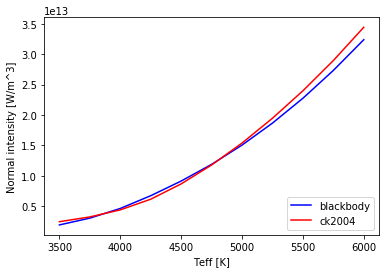

In [18]:
plt.xlabel('Teff [K]')
plt.ylabel('Normal intensity [W/m^3]')
plt.plot(teffs, pb.Inorm(teffs, loggs, abuns, atm='blackbody'), 'b-', label='blackbody')
plt.plot(teffs, pb.Inorm(teffs, loggs, abuns, atm='ck2004'), 'r-', label='ck2004')
plt.legend(loc='lower right')
plt.show()

If you are interested in the underlying structures, you can take a look at those too:

In [19]:
pb._ck2004_axes

(array([ 3500.,  3750.,  4000.,  4250.,  4500.,  4750.,  5000.,  5250.,
         5500.,  5750.,  6000.,  6250.,  6500.,  6750.,  7000.,  7250.,
         7500.,  7750.,  8000.,  8250.,  8500.,  8750.,  9000.,  9250.,
         9500.,  9750., 10000., 10250., 10500., 10750., 11000., 11250.,
        11500., 11750., 12000., 12250., 12500., 12750., 13000., 14000.,
        15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.,
        23000., 24000., 25000., 26000., 27000., 28000., 29000., 30000.,
        31000., 32000., 33000., 34000., 35000., 36000., 37000., 38000.,
        39000., 40000., 41000., 42000., 43000., 44000., 45000., 46000.,
        47000., 48000., 49000., 50000.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.2,  0.5]))

In [20]:
pb._ck2004_energy_grid.shape

(76, 11, 8, 1)

In [21]:
pb._ck2004_photon_grid.shape

(76, 11, 8, 1)

In [26]:
pb._ck2004_photon_grid[:,9,3,0]

array([12.33271425, 12.47687095, 12.62188819, 12.76872069, 12.91827135,
       13.04301443, 13.14951502, 13.24324436, 13.32692624, 13.40306574,
       13.47380249, 13.5404639 , 13.60424941, 13.66558199, 13.72450218,
       13.78097792, 13.83484482, 13.88597403, 13.93410152, 13.97891663,
       14.01938593, 14.05452671, 14.08551875, 14.1134393 , 14.13902324,
       14.16262445, 14.18452225, 14.20488911, 14.2241813 , 14.24247661,
       14.25999041, 14.27680163, 14.2930069 , 14.3086715 , 14.32387923,
       14.33862137, 14.3529595 , 14.36689411, 14.38045714, 14.43127314,
       14.47754412, 14.52020153, 14.56007763, 14.59780609, 14.6337748 ,
       14.66831003, 14.70166245, 14.73402873, 14.76554621, 14.79655696,
       14.82688441, 14.85681068, 14.8864604 , 14.91605655, 14.94591037,
       14.97628904, 15.00697154, 15.03729637, 15.06702372, 15.09452195,
       15.11949025, 15.1419067 , 15.1615942 , 15.17870107, 15.19361847,
       15.20689938, 15.21906774, 15.23051029, 15.24145021, 15.25

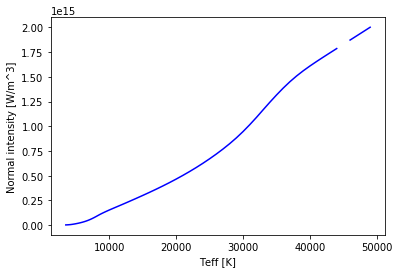

In [29]:
plt.xlabel('Teff [K]')
plt.ylabel('Normal intensity [W/m^3]')
plt.plot(pb._ck2004_axes[0], 10**pb._ck2004_photon_grid[:,9,3,0], 'b-')
plt.show()